In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('weekly_final_data.csv')

In [3]:
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])
df.head()

,air_area_name,genre_name,visitors,current_week,latitude,longitude
0,Tōkyō-to Minato-ku Shibakōen,Japanese food,2069,0,35.658068,139.751599
1,Tōkyō-to Minato-ku Shibakōen,Japanese food,2092,1,35.658068,139.751599
2,Tōkyō-to Minato-ku Shibakōen,Japanese food,2095,2,35.658068,139.751599
3,Tōkyō-to Minato-ku Shibakōen,Japanese food,1999,3,35.658068,139.751599
4,Tōkyō-to Minato-ku Shibakōen,Japanese food,1983,4,35.658068,139.751599


In [4]:
from sklearn.preprocessing import LabelEncoder
#convert strings to numeric value
number = LabelEncoder()
df["air_area_name"] = number.fit_transform(df["air_area_name"].astype('str'))
df["genre_name"] = number.fit_transform(df["genre_name"].astype('str'))

#df.head()

In [5]:
#preview converted df
df.head()

,air_area_name,genre_name,visitors,current_week,latitude,longitude
0,46,5,2069,0,35.658068,139.751599
1,46,5,2092,1,35.658068,139.751599
2,46,5,2095,2,35.658068,139.751599
3,46,5,1999,3,35.658068,139.751599
4,46,5,1983,4,35.658068,139.751599


In [6]:
#Normalizes values in a list (weak against large outliers)
def min_max_normalize(lst):
    minimum = min(lst)
    maximum = max(lst)
    normalized = []
    for val in lst:
        normalized.append((val-minimum)/(maximum-minimum))
    return normalized

In [7]:
#Normalize values in df
new_dict = {}

for id in df.columns:
    new_dict[id] = min_max_normalize(df[id])
        
#create normalized df
new_df = pd.DataFrame(new_dict)

new_df.head()

,air_area_name,genre_name,visitors,current_week,latitude,longitude
0,0.597403,0.625,0.199688,0.000000,0.226309,0.6788
1,0.597403,0.625,0.201928,0.019231,0.226309,0.6788
2,0.597403,0.625,0.202220,0.038462,0.226309,0.6788
3,0.597403,0.625,0.192873,0.057692,0.226309,0.6788
4,0.597403,0.625,0.191315,0.076923,0.226309,0.6788


In [8]:
#Group by week and find avg visitors per week
week_group = new_df.groupby(['current_week'])
mean_visitor_per_week = week_group['visitors'].mean()

#Convert to df
# weeks = []
# means = []
# for key, value in mean_visitor_per_week.items():
#     weeks.append(key)
#     means.append(value)
    
# mean_dict = {'current_week': weeks, 'avg_visitors': means}
# mean_df = pd.DataFrame(mean_dict)
# mean_df.head()

#Easier way of converting to df
mean_df = pd.DataFrame(mean_visitor_per_week)
mean_df = mean_df.reset_index()
mean_df.head()

,current_week,visitors
0,0.000000,0.048505
1,0.019231,0.049780
2,0.038462,0.048960
3,0.057692,0.052378
4,0.076923,0.049703


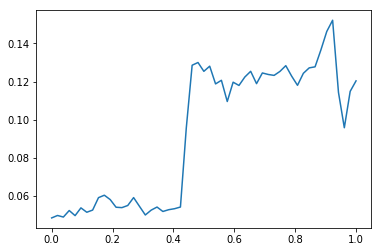

In [9]:
#compare weekly visitors
plt.plot(mean_df['current_week'], mean_df['visitors'])
plt.show()

In [10]:
#Reshape values
X = mean_df['current_week'].values
y = mean_df['visitors'].values
X = X.reshape(-1,1)
y = y.reshape(-1,1)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (53, 1)
y shape:  (53, 1)


In [11]:
from sklearn.model_selection import train_test_split
#split data to training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
from sklearn.neighbors import KNeighborsRegressor
#create regeressor 
regressor = KNeighborsRegressor(n_neighbors=5)

In [13]:
#fit training data
regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [14]:
# plt.scatter(X_train, y_train)
# plt.show()

In [15]:
#predict training
predict = regressor.predict(X_train)

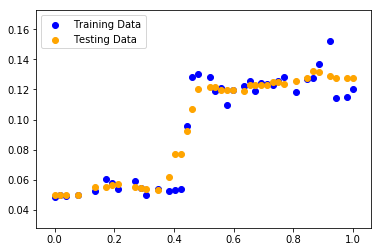

In [16]:
#training data vs training predcitions
plt.scatter(X_train, y_train, c="blue", label="Training Data")
plt.scatter(X_train, predict, c="orange", label="Testing Data")
plt.legend()
plt.show()

In [17]:
#Training R2
regressor.score(X_train, y_train)

0.9360620233253385

In [18]:
#predict test
predict_test = regressor.predict(X_test)

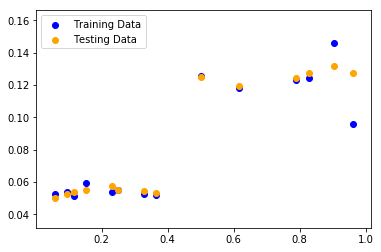

In [19]:
#Test data vs Test predictions
plt.scatter(X_test, y_test, c="blue", label="Training Data")
plt.scatter(X_test, predict_test, c="orange", label="Testing Data")
plt.legend()
plt.show()

In [20]:
#Test R2
regressor.score(X_test, y_test)

0.9254978376574279

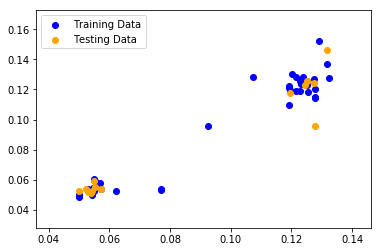

In [21]:
#Training prediction vs Test predictions
plt.scatter(predict, y_train, c="blue", label="Training Data")
plt.scatter(predict_test, y_test, c="orange", label="Testing Data")
plt.legend()
plt.show()

k: 1, Train/Test Score: 1.000/0.964
k: 3, Train/Test Score: 0.976/0.931
k: 5, Train/Test Score: 0.936/0.925
k: 7, Train/Test Score: 0.907/0.913
k: 9, Train/Test Score: 0.886/0.893
k: 11, Train/Test Score: 0.857/0.855
k: 13, Train/Test Score: 0.826/0.832
k: 15, Train/Test Score: 0.808/0.828
k: 17, Train/Test Score: 0.795/0.782
k: 19, Train/Test Score: 0.757/0.733


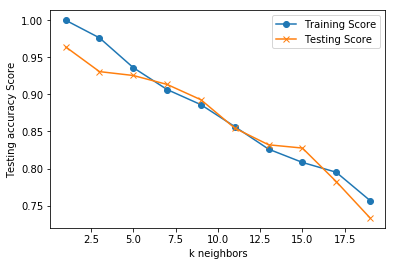

In [22]:
#Check for optimal k
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o',label="Training Score")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="Testing Score")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.legend()
plt.show()

Testing ALL values as features

In [23]:
new_y = new_df['visitors']
new_X = new_df.drop(columns= 'visitors')
new_X.head()

,air_area_name,genre_name,current_week,latitude,longitude
0,0.597403,0.625,0.000000,0.226309,0.6788
1,0.597403,0.625,0.019231,0.226309,0.6788
2,0.597403,0.625,0.038462,0.226309,0.6788
3,0.597403,0.625,0.057692,0.226309,0.6788
4,0.597403,0.625,0.076923,0.226309,0.6788


In [24]:
#Split into training and test
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, random_state=42)

In [25]:
#Create new regressor and fit it with training data
new_regressor = KNeighborsRegressor(n_neighbors=5)
new_regressor.fit(new_X_train, new_y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [26]:
#predict training
train_predict = new_regressor.predict(new_X_train)

In [27]:
#Training R2
new_regressor.score(new_X_train, new_y_train)

0.7040546505998194

In [28]:
#Test R2
new_regressor.score(new_X_test, new_y_test)

0.6495642669850696

In [29]:
#predict test
test_predict = new_regressor.predict(new_X_test)

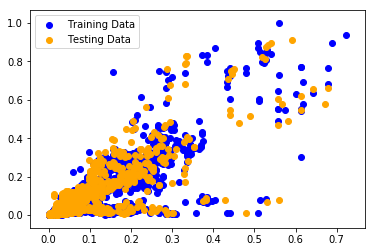

In [30]:
#Training(blue) vs Test(orange)
plt.scatter(train_predict, new_y_train, c="blue", label="Training Data")
plt.scatter(test_predict, new_y_test, c="orange", label="Testing Data")
plt.legend()
plt.show()

k: 1, Train/Test Score: 1.000/0.392
k: 3, Train/Test Score: 0.830/0.626
k: 5, Train/Test Score: 0.704/0.650
k: 7, Train/Test Score: 0.664/0.609
k: 9, Train/Test Score: 0.622/0.565
k: 11, Train/Test Score: 0.568/0.539
k: 13, Train/Test Score: 0.549/0.522
k: 15, Train/Test Score: 0.534/0.508
k: 17, Train/Test Score: 0.509/0.467
k: 19, Train/Test Score: 0.471/0.436


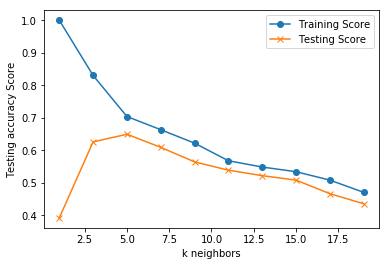

In [31]:
#Check for optimal k
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(new_X_train, new_y_train)
    train_score = knn.score(new_X_train, new_y_train)
    test_score = knn.score(new_X_test, new_y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o', label="Training Score")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="Testing Score")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.legend()
plt.show()